In [ ]:
import nibabel as nib
from totalsegmentator.python_api import totalsegmentator
import os
import SimpleITK as sitk
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import numpy as np
from image_utils import convert_series_to_nifti, quantize_maps

import registration_gui as rgui
import logging
from image_utils import ImageVisualizer, delete_niigz_files
%matplotlib inline

In [ ]:
delete_niigz_files('D:\\CTH_archive\\CTH_STRIPPED')

Final metric value: -0.2513750206913914
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 35.
Registration successful for patient: LOPEZ_LEONOR. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\LOPEZ_LEONOR.h5


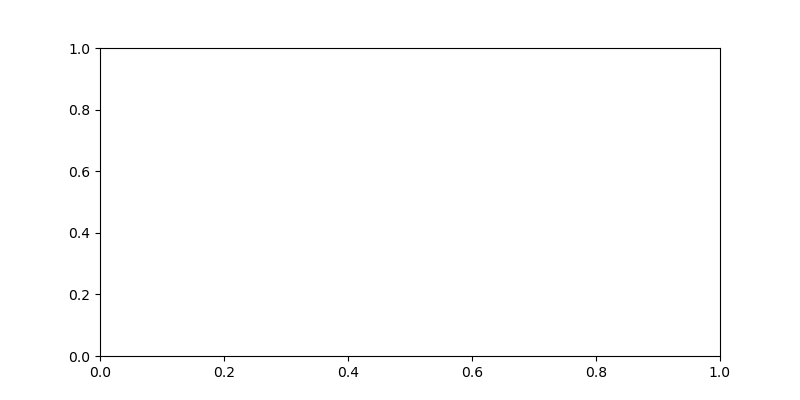

Final metric value: -0.22612925104367546
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Registration successful for patient: LORD_JANE. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\LORD_JANE.h5


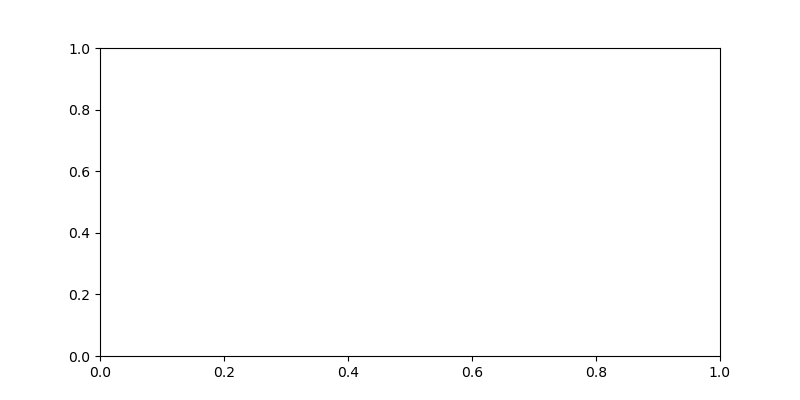

Final metric value: -0.18641065069419338
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Registration successful for patient: LOVE_MARY_E. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\LOVE_MARY_E.h5


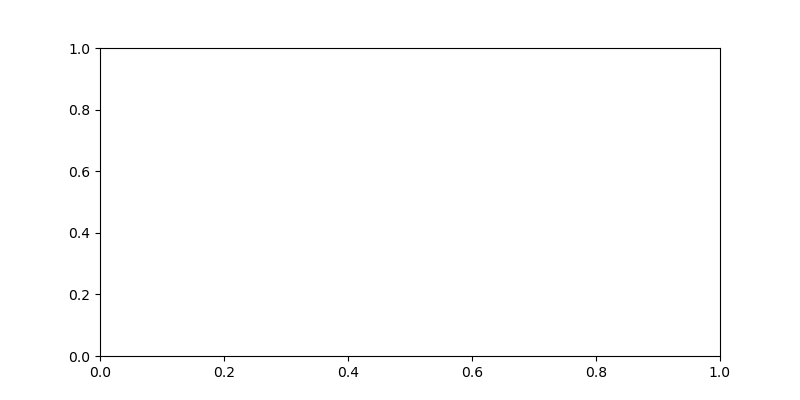

Final metric value: -0.45948604467339255
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 36.
Registration successful for patient: LUNA_LOURDES. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\LUNA_LOURDES.h5


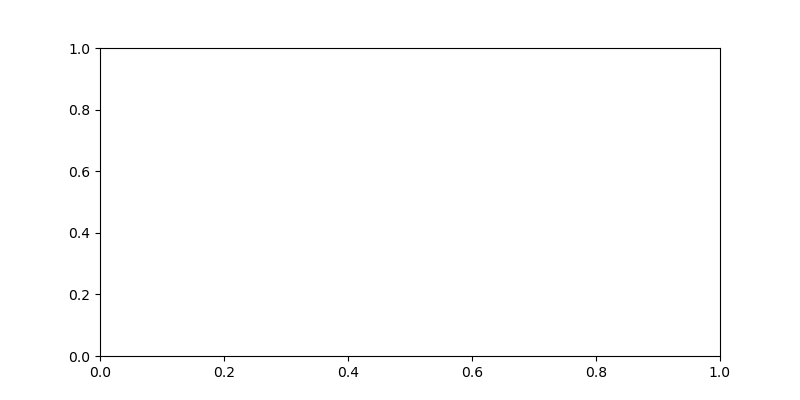

Final metric value: -0.2385070326348084
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Registration successful for patient: MATABUENA_LUZVIMINDA. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MATABUENA_LUZVIMINDA.h5


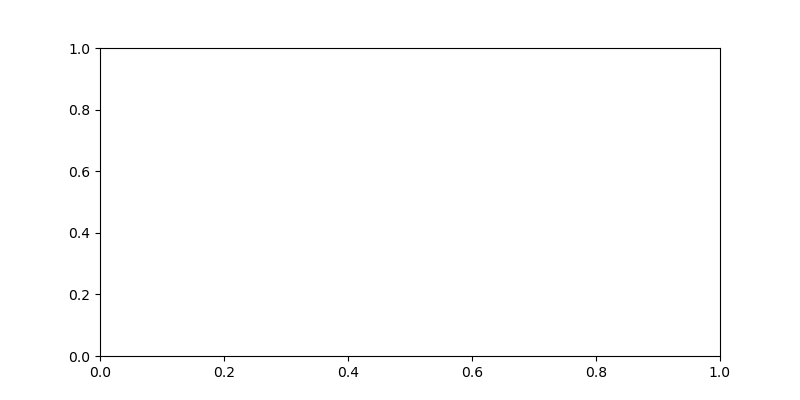

Final metric value: -0.17198036256889332
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 28.
Registration successful for patient: MAURICIO_DENICE. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MAURICIO_DENICE.h5


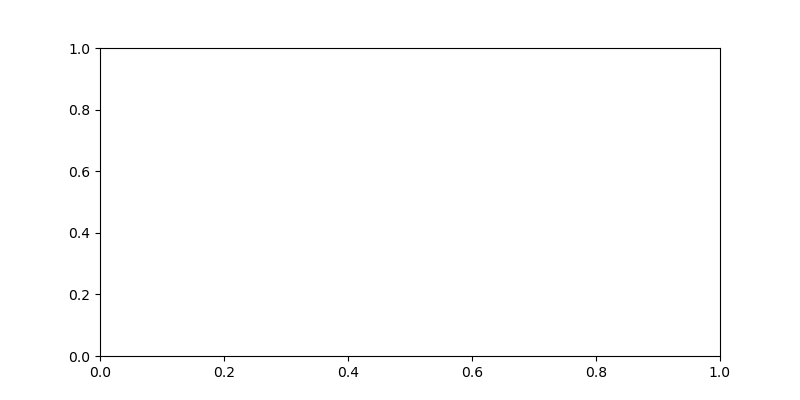

Final metric value: -0.4049011878239369
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MCGIVNEY_DOROTHY. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MCGIVNEY_DOROTHY.h5


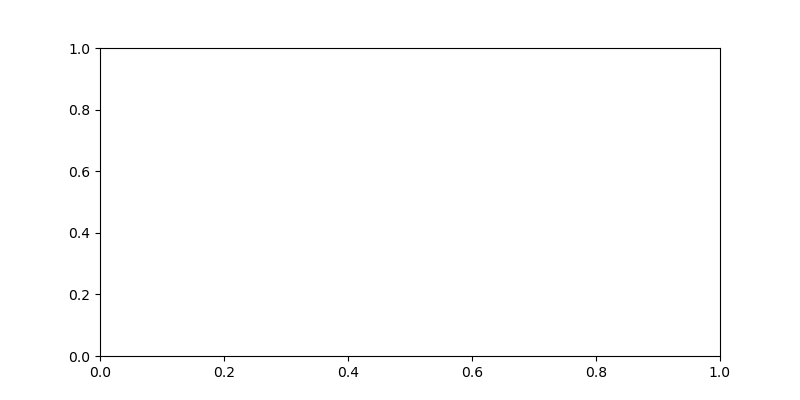

Final metric value: -0.15017097068970733
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MEDINA_ANNA. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MEDINA_ANNA.h5


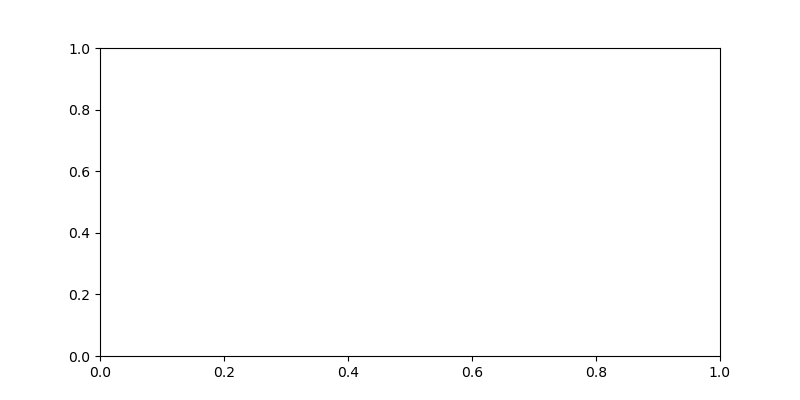

Final metric value: -0.17643770595381206
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 21.
Registration successful for patient: MENA-ROSA_IDIDA_MERCEDES. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MENA-ROSA_IDIDA_MERCEDES.h5


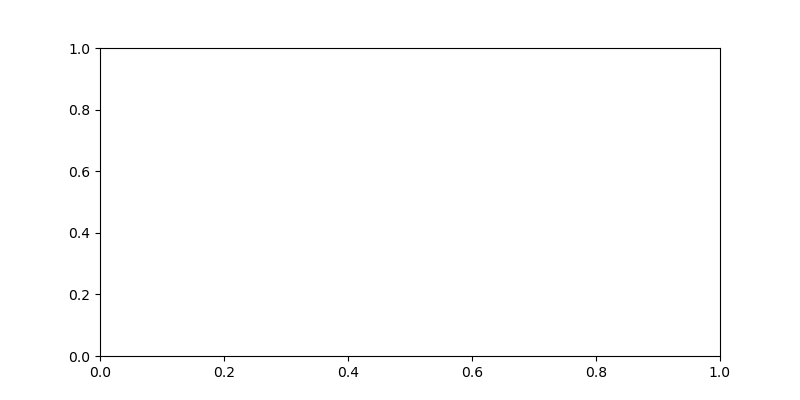

Final metric value: -0.3831601017790725
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 18.
Registration successful for patient: MENDOZA_REMEDIOS. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MENDOZA_REMEDIOS.h5


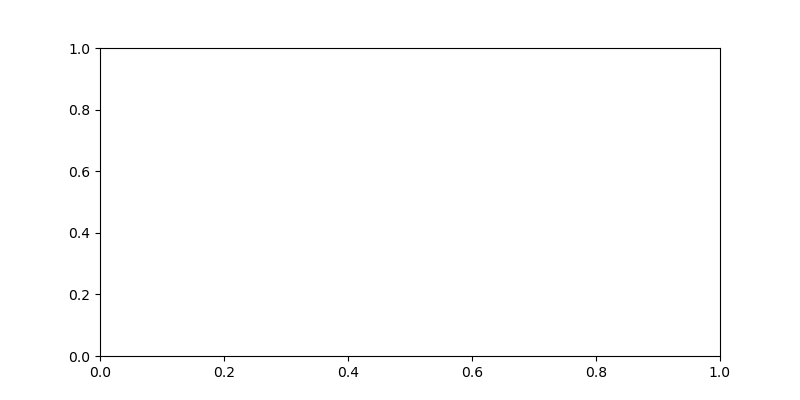

Final metric value: -0.18384214135224436
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Registration successful for patient: MESSINA_CALOGERO. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MESSINA_CALOGERO.h5


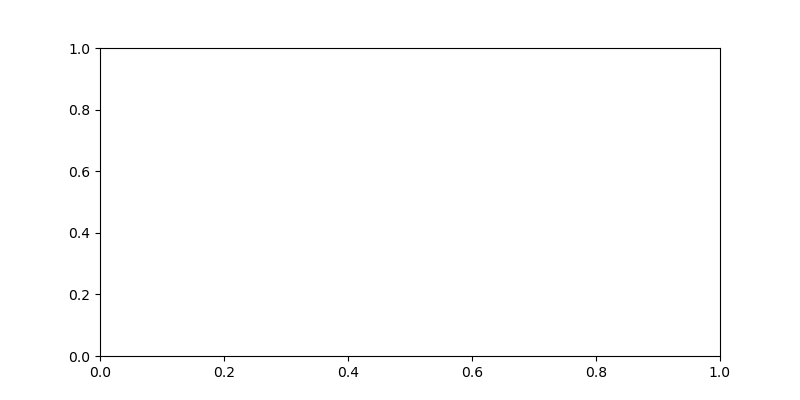

Final metric value: -0.11506509522484097
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MILLS_JOAN. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MILLS_JOAN.h5


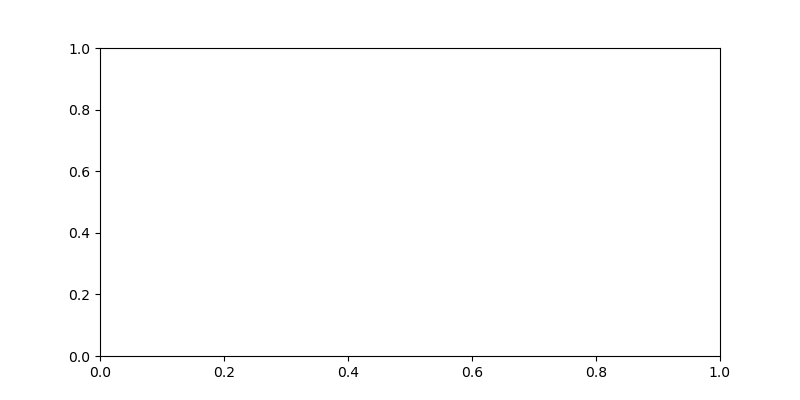

Final metric value: -0.27066820441730427
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MIRABAL_JORGE. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MIRABAL_JORGE.h5


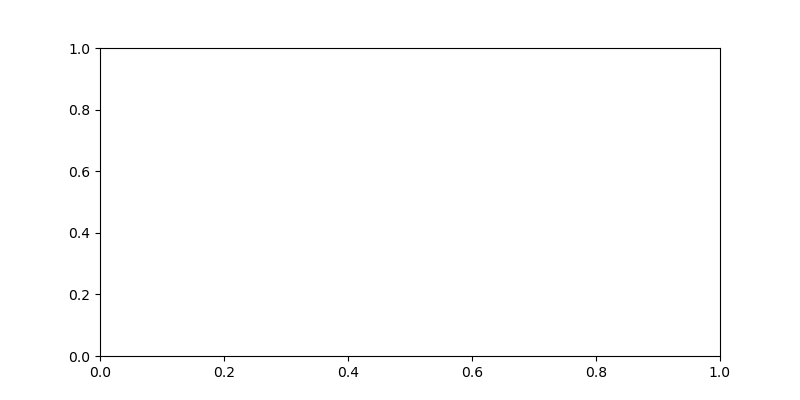

Final metric value: -0.4367697305625607
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MITCHELL_ROSA. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MITCHELL_ROSA.h5


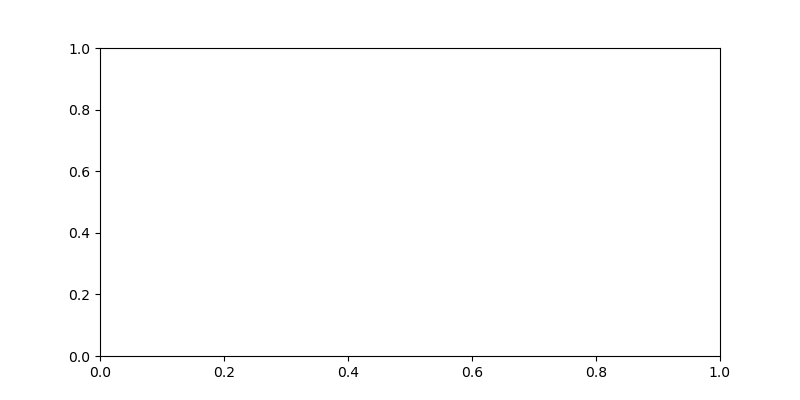

Final metric value: -0.1406625142337563
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 9.
Registration successful for patient: MONTANEZ_PETER_A. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MONTANEZ_PETER_A.h5


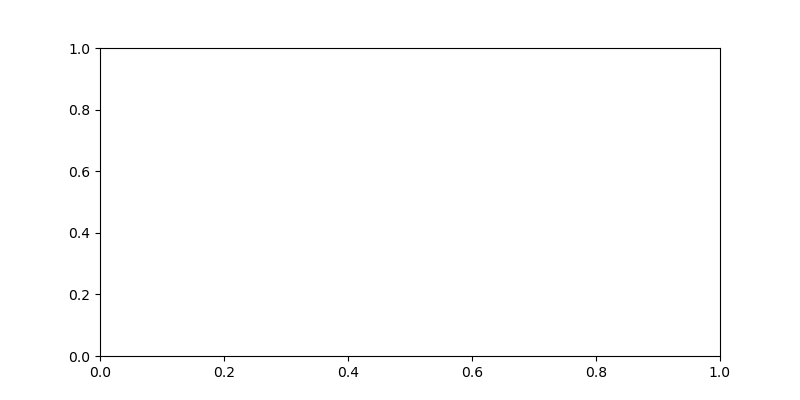

Final metric value: -0.0010445189111056082
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 13.
Registration successful for patient: MONTERO_RAMIREZ_MICAELA. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MONTERO_RAMIREZ_MICAELA.h5


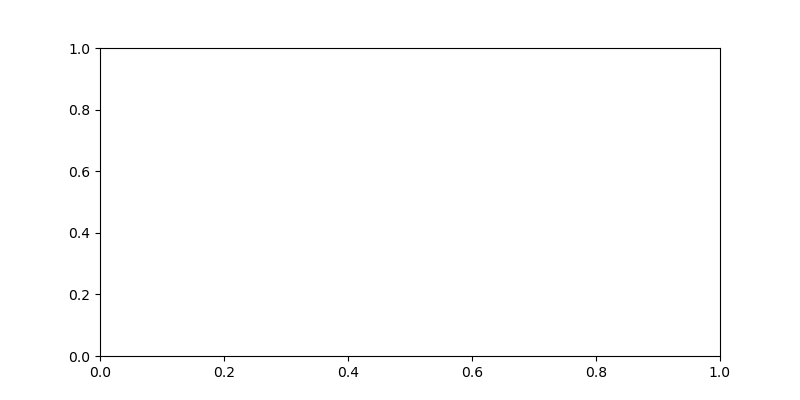

Final metric value: -0.14482465456870025
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Registration successful for patient: MORENO_JORGE. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MORENO_JORGE.h5


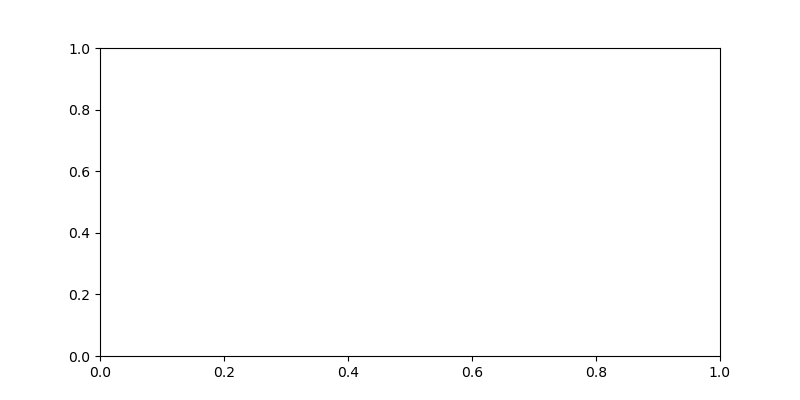

Final metric value: -0.24241202704420092
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 14.
Registration successful for patient: MULDOON_GERALDINE_A. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\MULDOON_GERALDINE_A.h5


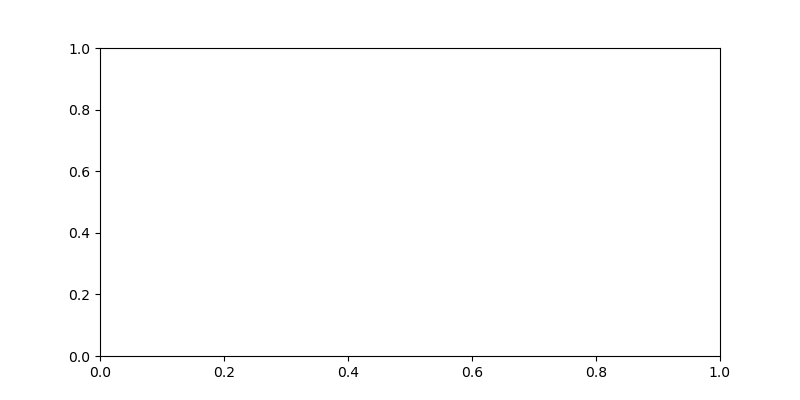

KeyboardInterrupt: 

Registration failed for patient NAJERA_JOSE: Exception thrown in SimpleITK ImageRegistrationMethod_Execute: D:\a\1\sitk\Wrapping\Python\sitkPyCommand.cxx:135:
sitk::ERROR: There was an error executing the Python Callable.


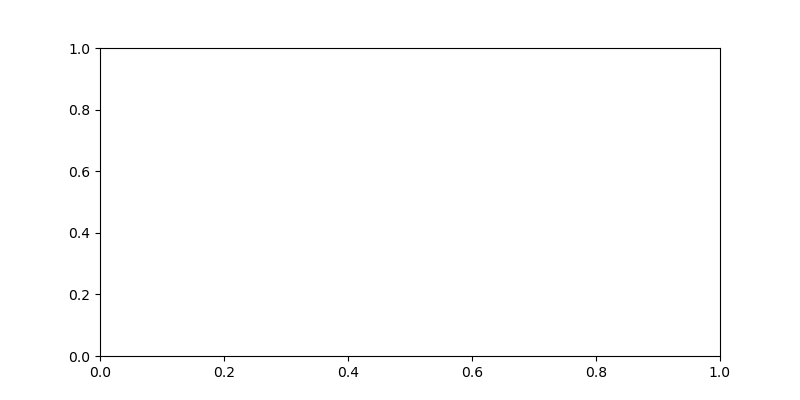

Final metric value: -0.2953937635062919
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 11.
Registration successful for patient: NAVAS_RAFAEL. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\NAVAS_RAFAEL.h5


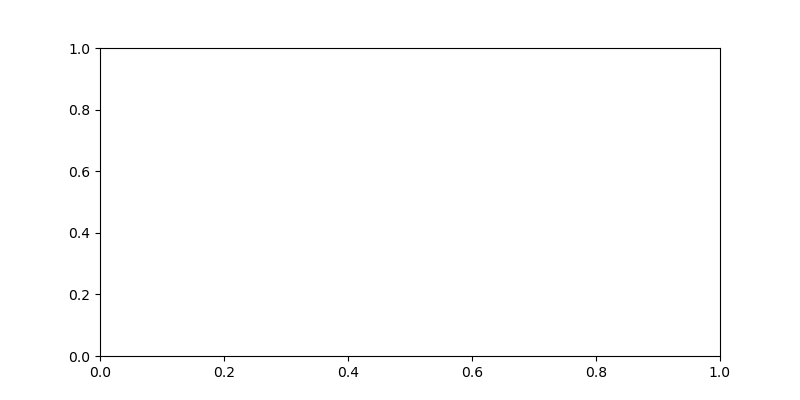

Final metric value: -0.25239959562299075
Optimizer's stopping condition, GradientDescentOptimizerv4Template: Convergence checker passed at iteration 12.
Registration successful for patient: NICHOLAS_LOLA. Transform saved to D:/CTH_archive/TRANSFORMS_TEST\NICHOLAS_LOLA.h5


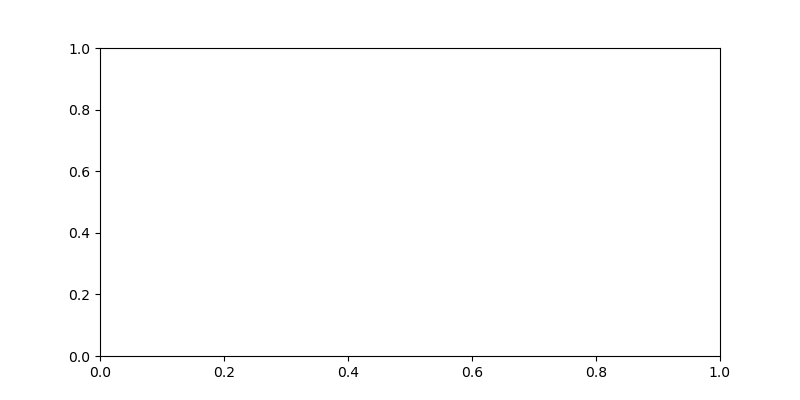

In [6]:
transforms_dir = "D:/CTH_archive/TRANSFORMS"
fixed_images_dir = "D:/CTH_archive/CTH_STRIPPED"  
moving_images_dir = "D:/CTH_archive/CTP_STRIPPED" 

def register_images(fixed_image_path, moving_image_path, transforms_dir):
    # Extract patient identifier from the file name, ensuring .nii is not included
    patient = os.path.splitext(os.path.basename(moving_image_path))[0]
    patient = os.path.splitext(patient)[0]  # Remove .nii if present

    # Construct the transform file path
    transform_file = os.path.join(transforms_dir, f'{patient}.h5')

    # Check if the transform file already exists and skip registration if it does
    if os.path.exists(transform_file):
        print(f"Transform file already exists for patient {patient}, skipping registration.")
        return

    # Load the fixed and moving images
    fixed_image = sitk.ReadImage(fixed_image_path)
    moving_image = sitk.ReadImage(moving_image_path)

    
    initial_transform = sitk.CenteredTransformInitializer(
    fixed_image,
    moving_image,
    sitk.Euler3DTransform(),
    sitk.CenteredTransformInitializerFilter.GEOMETRY,
)
    
    registration_method = sitk.ImageRegistrationMethod()

    # Similarity metric settings.
    registration_method.SetMetricAsMattesMutualInformation(numberOfHistogramBins=50)
    registration_method.SetMetricSamplingStrategy(registration_method.RANDOM)
    registration_method.SetMetricSamplingPercentage(0.02)

    registration_method.SetInterpolator(sitk.sitkNearestNeighbor)

    # Optimizer settings.
    registration_method.SetOptimizerAsGradientDescent(
        learningRate=1.0,
        numberOfIterations=100,
        convergenceMinimumValue=1e-6,
        convergenceWindowSize=10,
    )
    registration_method.SetOptimizerScalesFromPhysicalShift()

    # Setup for the multi-resolution framework.
    registration_method.SetShrinkFactorsPerLevel(shrinkFactors=[4, 2, 1])
    registration_method.SetSmoothingSigmasPerLevel(smoothingSigmas=[2, 1, 0])
    registration_method.SmoothingSigmasAreSpecifiedInPhysicalUnitsOn()

    # Set the initial moving and optimized transforms.
    optimized_transform = sitk.Euler3DTransform()
    registration_method.SetMovingInitialTransform(initial_transform)
    registration_method.SetInitialTransform(optimized_transform, inPlace=False)

    # Connect all of the observers so that we can perform plotting during registration.
    registration_method.AddCommand(sitk.sitkStartEvent, rgui.start_plot)
    registration_method.AddCommand(sitk.sitkEndEvent, rgui.end_plot)
    registration_method.AddCommand(
        sitk.sitkMultiResolutionIterationEvent, rgui.update_multires_iterations
    )
    registration_method.AddCommand(
        sitk.sitkIterationEvent, lambda: rgui.plot_values(registration_method)
    )

    try:
        # Execute the registration
        registration_method.Execute(fixed_image, moving_image)

        # Always check the reason optimization terminated.
        print("Final metric value: {0}".format(registration_method.GetMetricValue()))
        print("Optimizer's stopping condition, {0}".format(registration_method.GetOptimizerStopConditionDescription()))
        
        # Instead of creating and saving a CompositeTransform, save the optimized_transform directly
        sitk.WriteTransform(optimized_transform, transform_file)

        # If you need to apply the initial transform as well, consider applying it to the moving image first and then register the result to the fixed image.
        # Alternatively, you can apply both transforms to the moving image for resampling, without creating a CompositeTransform.

        # Resample the moving image using the final (optimized) transform
        resampled_moving_image = sitk.Resample(moving_image, fixed_image, optimized_transform, sitk.sitkNearestNeighbor)
        sitk.WriteImage(resampled_moving_image, f"D:/CTH_archive/CTP_STRIPPED_REG/{patient}.nii")

        print(f"Registration successful for patient: {patient}. Transform saved to {transform_file}")
    except RuntimeError as e:
        print(f"Registration failed for patient {patient}: {e}")



test_num = 10
for filename in tqdm(os.listdir(fixed_images_dir)):
    fixed_image_path = os.path.join(fixed_images_dir, filename)
    moving_image_path = os.path.join(moving_images_dir, filename)

    if os.path.isfile(fixed_image_path) and os.path.isfile(moving_image_path):
        register_images(fixed_image_path, moving_image_path, transforms_dir)


In [ ]:
FINAL_SIZE = 512

def resample_image(moving_image, ctp_image):
    desired_size = [FINAL_SIZE, FINAL_SIZE, ctp_image.GetSize()[2]] # Use the same number of slices as the CTP image
    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(moving_image)
    resampler.SetSize(desired_size)
    resampler.SetOutputSpacing([moving_image.GetSpacing()[i] * (moving_image.GetSize()[i] / desired_size[i]) for i in range(3)]) 
    resampler.SetInterpolator(sitk.sitkLinear)
    resized_moving_image = resampler.Execute(moving_image)
    resized_moving_image.SetSpacing(ctp_image.GetSpacing())
    resized_moving_image.SetOrigin(ctp_image.GetOrigin())
    resized_moving_image.SetDirection(ctp_image.GetDirection())
    return resized_moving_image

def apply_final_transform(resized_moving_image, fixed_image, transform_file_path):
    final_transform = sitk.ReadTransform(transform_file_path)
    resampled_image = sitk.Resample(resized_moving_image, 
                                    fixed_image, 
                                    final_transform, 
                                    sitk.sitkNearestNeighbor, 
                                    0.0, 
                                    fixed_image.GetPixelID())
    return resampled_image

def apply_final_transform(resized_moving_image, fixed_image, transform_file_path):
    try:
        final_transform = sitk.ReadTransform(transform_file_path)
        
        # Ensure the resized_moving_image is valid before proceeding
        if resized_moving_image:
            resampled_image = sitk.Resample(resized_moving_image, 
                                            fixed_image, 
                                            final_transform, 
                                            sitk.sitkLinear, 
                                            0.0, 
                                            fixed_image.GetPixelID())
            return resampled_image
        else:
            logging.error("Resized moving image is invalid. Cannot apply final transform.")
            return None
    except Exception as e:
        logging.error("Failed to apply final transform: " + str(e))
        return None

tmax_nifti_dir = r"D:/CTH_archive/TMAX_NIFTI"
transforms_dir = r"D:/CTH_archive/TRANSFORMS_TEST"
cth_stripped_dir = r"D:/CTH_archive/CTH_STRIPPED"
ctp_stripped_dir = r"D:/CTH_archive/CTP_STRIPPED"
output_dir = r'D:/CTH_archive/TMAX_REGISTERED_TEST'

# Ensure the output directory exists
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Iterate over the transformation files
for transform_file in os.listdir(transforms_dir):
    transform_path = os.path.join(transforms_dir, transform_file)
    base_filename = transform_file.replace('.h5', '')

    # Paths to the moving, fixed, and reference (ctp) images
    moving_image_path = os.path.join(tmax_nifti_dir, base_filename + '.nii')
    fixed_image_path = os.path.join(cth_stripped_dir, base_filename + '.nii')
    ctp_image_path = os.path.join(ctp_stripped_dir, base_filename + '.nii')
    print(f"Processing {base_filename}...")

    # Check if all required files exist
    if os.path.exists(moving_image_path) and os.path.exists(fixed_image_path) and os.path.exists(ctp_image_path):
        # Load images
        moving_image = sitk.ReadImage(moving_image_path)
        fixed_image = sitk.ReadImage(fixed_image_path)
        ctp_image = sitk.ReadImage(ctp_image_path)

        # Resample the moving image
        resized_moving_image = resample_image(moving_image, ctp_image)

        # Apply the final transformation
        resampled_image = apply_final_transform(resized_moving_image, fixed_image, transform_path)

        # Save the resampled image
        resampled_image_path = os.path.join(output_dir, base_filename + '.nii')
        sitk.WriteImage(resampled_image, resampled_image_path)
        print(f"Processed and saved: {resampled_image_path}")
    else:
        print(f"Required files for {base_filename} are not available.")